<a href="https://colab.research.google.com/github/shubhj17/Machine_Learning_Algos/blob/master/Multivariate_Regression_on_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mpt
import random
from IPython.display import clear_output

In [0]:
# Loading data into pandas dataframe

data = pd.read_csv("/content/sample_data/california_housing_train.csv")


In [21]:
# Getting all the columns of data

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [20]:
#Checking correlation between columns for selecting best features 

data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [4]:
# Selecting target column and converting it into numpy array 

target = data['median_house_value']
target = np.array(target)
target = np.reshape(target,[1,len(target)])
print(target.shape)

(1, 17000)


In [5]:
# Selecting feature column and converting it into numpy array 

features = data.drop(['median_house_value'],axis=1).copy()
feature = np.array(features)
print(feature.shape)

(17000, 8)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [0]:
#Normalising our target and feature variables

target = target/target.max()
feature = feature/feature.max()

In [0]:
# Defining Functions 

def line(m,x,c):
  return np.dot(m,x.T) + c

def error(m,x,c,y):
  return np.mean((line_multidim(m,x,c) - y)**2)

def partial_slope(m,x,c,y):
  return 2*np.mean(np.multiply((line(m,x,c)-y),x.T),axis = 1)

def partial_intercept(m,x,c,y):
  return 2*np.mean((line(m,x,c))-y)

def accuracy(error,y):
  return 100 - (error/np.mean(y**2))*100

Current Error:  0.059387536747341416 Current Iteration: 999
Current Accuracy: 73.68734694863433


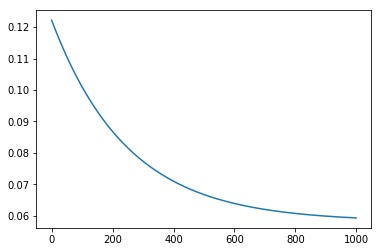

In [19]:
# Training our Dataset and printing its error with accuracy

m = np.random.randn(1,8)
c = random.random()
lr = 0.001
error_arr = []
for i in range(0,1000):
  m = m - lr*(partial_slope(m,feature,c,target))
  c = c - lr*(partial_intercept(m,feature,c,target))
  error_arr.append(error(m,feature,c,target))
  clear_output(True)
  #print(accuracy(error_arr,target))
  print("Current Error: ",error(m,feature,c,target),"Current Iteration:",i)
  print("Current Accuracy:",accuracy(error(m,feature,c,target),target))
  
mpt.plot(error_arr)
mpt.show()
